In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

from utils import DATA_DIR, load_clean_data, load_data
from scipy.sparse import csr_matrix

In [3]:
df = load_data()

#Aqui transforma as colunas em categorias para melhorar a performance
df['Prscrbr_NPI'] = df['Prscrbr_NPI'].astype('category')
df['Gnrc_Name'] = df['Gnrc_Name'].astype('category')
df['Prscrbr_Type'] = df['Prscrbr_Type'].astype('category')
#Aqui transforma os valores em float
df['Tot_Clms'] = df['Tot_Clms'].astype(float)

# Cria a matriz esparsa para aplicar SVD
row_index = df['Prscrbr_NPI'].cat.codes
num_rows = df['Prscrbr_NPI'].cat.categories.size

col_index = df['Gnrc_Name'].cat.codes
num_cols = df['Gnrc_Name'].cat.categories.size

values = df['Tot_Clms'].values

sparse_matrix = csr_matrix(
    (values, (row_index, col_index)),
    shape=(num_rows, num_cols),
)

Loading data from c:\Users\eduya\github-classroom\4-semestre\materias-aula\machine-learning\machine_learning\labs\prova\svd\data\Medicare_Part_D_Prescribers_by_Provider_and_Drug_2022.csv


Não rodar essa celula porque o df ta mt grande e trava

In [5]:

#num_components implica em quanto dos valores singulares serão mantidos (acho que realiza uma mult com a matriz S de valores singulares)
#Um numero baixo assim como pode deixar mais preciso, também pode perder informações relevantes

from scipy.sparse.linalg import svds
num_components = 5
U, sigma, Vt = svds(sparse_matrix, k=num_components)

print(f"U tem {U.shape[0]} linhas e {U.shape[1]} colunas")
print(f"Note que Sigma tem n_componets valores singulares em uma coluna {sigma.shape}")
print(f"Vt tem {Vt.shape[0]} linhas e {Vt.shape[1]} colunas")
print("----------------------------------------------------------")

# Isso mostra que U e Vt são matrizes singulares e portanto U@U.T e Vt@Vt.T são matrizes identidade
# a = (U.T@U).round(2)
# b = (Vt @ Vt.T).round(2)


# sigma vem como uma linha [x y z k ...]  com quant de elementos igual a num_components
# Para reconstruir a matriz original, precisamos expandir sigma para uma matriz diagonal
Sigma_expanded = np.diag(sigma)

# Reconstruct the matrix A_approx
A_approx = np.dot(U, np.dot(Sigma_expanded, Vt))
print(A_approx)
print(sparse_matrix.toarray())

print(f"""
----------------------------------------------------------
IDENTIFICAÇÃO DE OUTLIERS:
Agora podemos analisar médicos e medicamentos separadamente para identificar outliers
Podemos dispor os médicos em um gráfico e utilizar a distância de coseno para identificar os mais distantes
PREVISÃO DE VALORES:
Podemos utilizar a decomposição para prever valores futuros, ou uma futura prescrição de um médico
""")


U tem 1057566 linhas e 20 colunas
Note que Sigma tem n_componets valores singulares em uma coluna (20,)
Vt tem 20 linhas e 1757 colunas
----------------------------------------------------------
[[ 9.92318191e-02  5.11843618e-07 -8.57937638e-05 ... -7.67006862e-03
   9.77581092e-01 -2.44894768e-01]
 [ 1.08239449e-01 -2.46967737e-05  5.01851646e-04 ...  5.01104606e-02
   4.92369426e+00  1.20815778e+00]
 [-9.62348284e-03  2.21027005e-06 -1.78734020e-05 ...  6.89127066e-04
   4.58531355e-01  1.50837954e-02]
 ...
 [-4.45056420e-03  1.19880314e-06 -1.30287579e-05 ...  3.72796627e-04
   4.36780933e-01  1.16595318e-02]
 [-4.74670864e-03 -1.85554798e-07  5.34310236e-05 ... -1.40107333e-03
   3.37859020e-01 -5.68538486e-02]
 [ 1.03640662e-02  3.28410388e-06 -4.85113578e-06 ... -3.86166008e-04
   1.98239502e-01 -2.14567523e-02]]


KeyboardInterrupt: 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


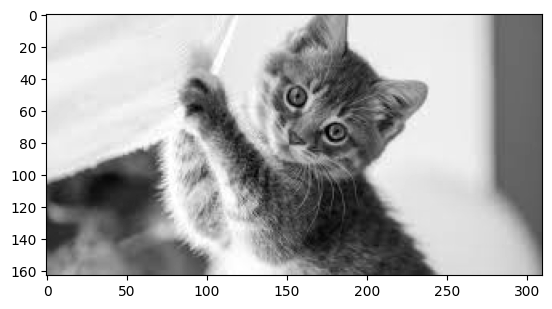

In [13]:
# img está com rgb, então é necessário converter para escala de cinza
img = mpimg.imread('data/image.png')
X = img.mean(axis=2)
plt.imshow(X, cmap='gray')



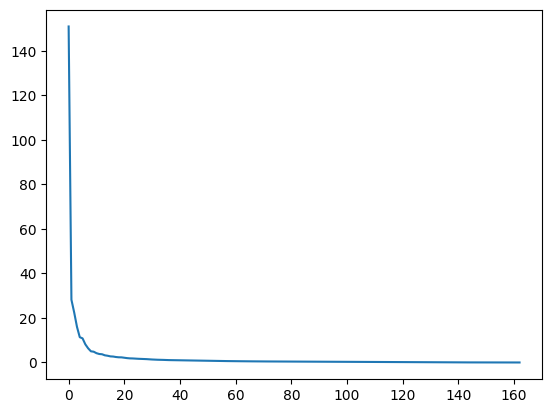

In [11]:
# Aplicando SVD
U, S, Vt = np.linalg.svd(X)
plt.plot(S)
#Essa imagem mostra que podemos reduzir a dimensionalidade da imagem sem perder muita informação


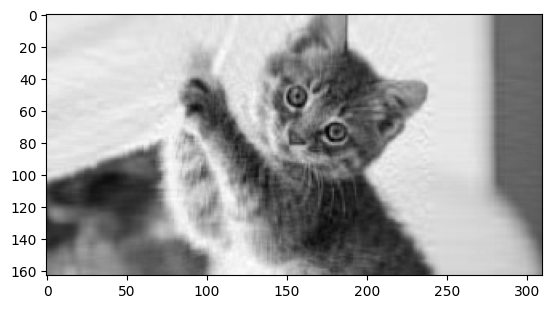

In [12]:
#No caso, vemos vizualmente que a imagem é bem representada com mais ou menos 30 componentes
detail_level = 30
U_aprox = U[:, :detail_level]
S_aprox = S[:detail_level]
Vt_aprox = Vt[:detail_level, :]

#tem que montar S como uma matriz diagonal
X_aprox = U_aprox @ np.diag(S_aprox) @ Vt_aprox
plt.imshow(X_aprox, cmap='gray')